In [0]:
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path = Path('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse')
path.ls()

[PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/Images'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/readme.txt'),
 PosixPath('/content/drive/My Drive/ML-DL Data/UCMerced_LandUse/readme.txt.bak')]

In [0]:
src = (ImageList.from_folder(path/'Images')
      .split_by_rand_pct(0.2)
      .label_from_folder())

In [0]:
data = (src.transform(get_transforms(flip_vert=True, max_warp=0), size=256)
        .databunch()
        .normalize(imagenet_stats))

In [0]:
metrics = [accuracy]
arch = models.resnet34

In [0]:
learn = cnn_learner(data, arch, metrics=metrics)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


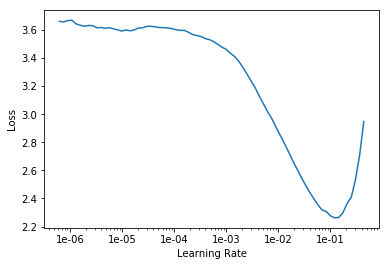

In [9]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.420887,2.662791,0.192399,00:13
1,2.741754,1.400493,0.662708,00:13
2,1.954165,0.791318,0.809976,00:13
3,1.421749,0.569642,0.850356,00:13
4,1.068548,0.478705,0.871734,00:13
5,0.840898,0.423334,0.878860,00:13
6,0.677062,0.398628,0.888361,00:13
7,0.581993,0.381099,0.897862,00:13
8,0.508793,0.370714,0.897862,00:13
9,0.465313,0.371051,0.897862,00:13


In [18]:
learn.fit_one_cycle(2, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.427432,0.357263,0.900238,00:13
1,0.383729,0.325111,0.912114,00:13


In [0]:
learn.save(path/'Stage-1')

In [0]:
learn.load(path/'Stage-1');

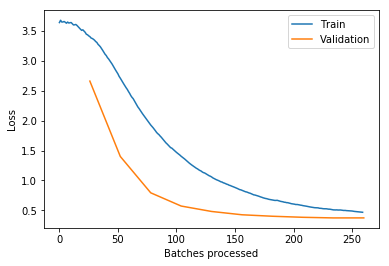

In [25]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


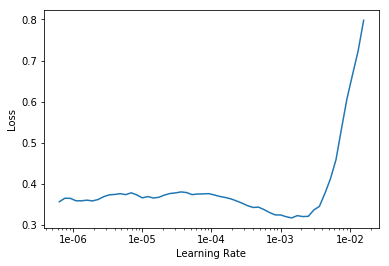

In [27]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(8, slice(1e-4, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.350804,0.266447,0.923990,00:13
1,0.278068,0.206780,0.935867,00:13
2,0.210310,0.137932,0.954869,00:13
3,0.170192,0.141046,0.954869,00:13
4,0.142739,0.124885,0.964371,00:14
5,0.109951,0.116943,0.961995,00:13
6,0.080150,0.103816,0.966746,00:13
7,0.062094,0.103735,0.969121,00:13


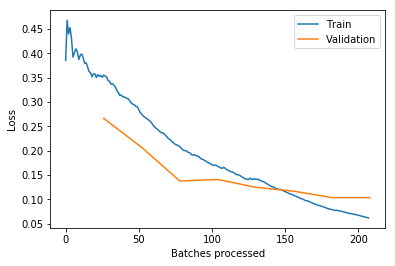

In [33]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-2')

In [0]:
learn.load(path/'Stage-2');

In [0]:
learn.data = data

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


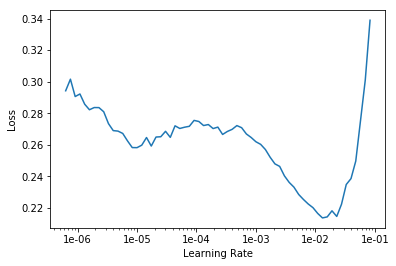

In [39]:
learn.lr_find()
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.261688,0.215984,0.928741,00:23
1,0.220749,0.167444,0.950119,00:22
2,0.169384,0.122783,0.964371,00:22
3,0.145765,0.119634,0.961995,00:22
4,0.123180,0.098067,0.971496,00:23
5,0.104180,0.099392,0.973872,00:22
6,0.088973,0.102300,0.971496,00:22
7,0.075973,0.088759,0.983373,00:22
8,0.068255,0.087014,0.976247,00:22
9,0.065144,0.085836,0.978622,00:22


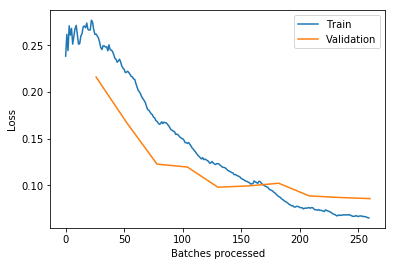

In [41]:
learn.recorder.plot_losses()

In [0]:
learn.save(path/'Stage-1_big')

In [0]:
learn.load(path/'Stage-1_big');

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


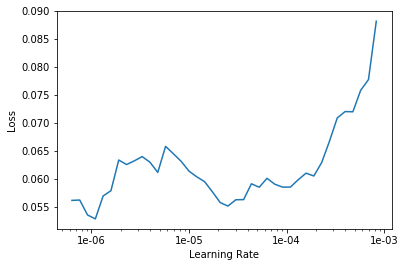

In [44]:
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(8, slice(3e-6, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.051095,0.085883,0.971496,00:24
1,0.053330,0.083825,0.976247,00:24
2,0.049462,0.080290,0.980998,00:24
3,0.042018,0.071341,0.976247,00:24
4,0.039156,0.065329,0.980998,00:24
5,0.037915,0.058326,0.983373,00:24
6,0.034950,0.057454,0.985748,00:24
7,0.031044,0.057005,0.988124,00:24


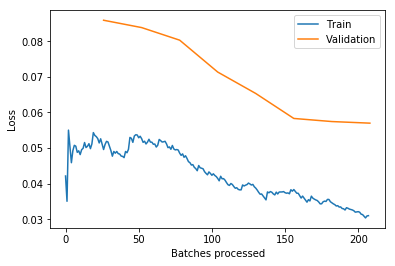

In [46]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-big')

In [48]:
learn.fit_one_cycle(2, slice(3e-6, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.020501,0.061697,0.983373,00:24
1,0.023477,0.057611,0.976247,00:24


In [0]:
learn.load('stage-2-big');

In [0]:
learn.save(path/'final_model')